In [1]:
import os
import glob
from functools import reduce

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Analysis
---

In [11]:
results_dir = "../../../../../results/apps/pub/vms/fanout/"
date_time_list = ["20170827035916.747697"]

cols = ['in (kbps)', 'out (kbps)'] 

In [28]:
dish_data_dict = {}
dish_data_dict['baseerat'] = {}
dish_data_dict['unicast'] = {}

for date_time in date_time_list:
    for i in glob.glob(results_dir + date_time + "/dish_stats_with__*"):
        scheme = i.split('__')[2].split('.')[1]
        if scheme == 'baseerat':
            dish_data_dict[scheme][1] = pd.read_csv(i, sep='\s*', header=None, skiprows=4, skipfooter=1, na_filter=False, names = cols)
        else:
            key = eval(i.split('__')[1].split('_')[1])
            dish_data_dict[scheme][key] = pd.read_csv(i, sep='\s*', header=None, skiprows=4, skipfooter=1, na_filter=False, names = cols)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/opt/conda/lib/python3.5/site-packages/pandas/io/parsers.py:2138: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/opt/conda/lib/python3.5/site-packages/pandas/io/parsers.py:2140: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [33]:
plot_data_dict = pd.DataFrame()

cols = [1, 2, 4, 8, 16, 32, 64, 128]

plot_data_dict['subscribers'] = cols

rows = []
for i in plot_data_dict['subscribers']:
    rows += [dish_data_dict['unicast'][i]['in (kbps)'].mean()]
plot_data_dict['unicast: throughput (kbps)'] = rows    

rows = []
for i in plot_data_dict['subscribers']:
    rows += [dish_data_dict['baseerat'][1]['in (kbps)'].mean()]
plot_data_dict['baseerat: throughput (kbps)'] = rows    

plot_data_dict = plot_data_dict.set_index('subscribers')

plot_data_dict

,unicast: throughput (kbps),baseerat: throughput (kbps)
subscribers,,
1,51099.023667,52937.975517
2,34821.176667,52937.975517
4,18006.987353,52937.975517
8,4009.291333,52937.975517
16,1852.993871,52937.975517
32,1014.201333,52937.975517
64,546.794667,52937.975517
128,276.811159,52937.975517


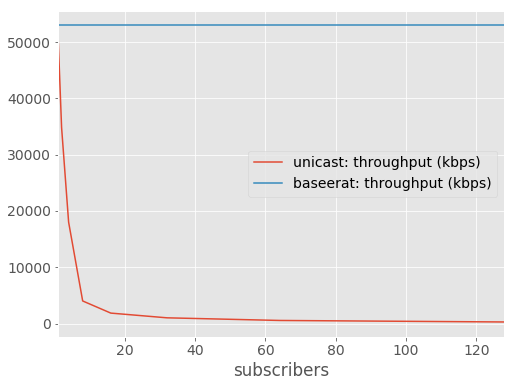

In [34]:
plot_data_dict[['unicast: throughput (kbps)', 'baseerat: throughput (kbps)']].plot(kind='line')

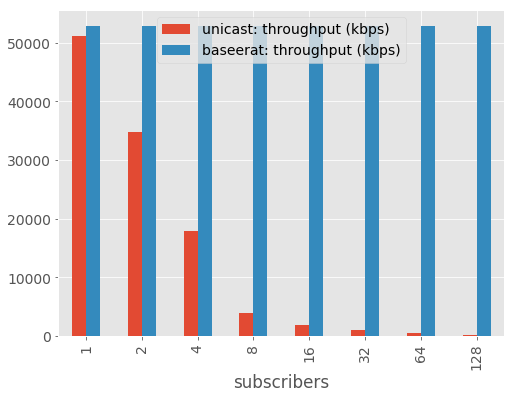

In [35]:
plot_data_dict[['unicast: throughput (kbps)', 'baseerat: throughput (kbps)']].plot(kind='bar')